<a href="https://colab.research.google.com/github/health4924/Cricsheet-Match-Analysis-by-health-royal-kediyon/blob/main/Brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Brain Tumor Detection Project**

In [75]:
# importing the reqired packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
tf.config.list_physical_devices("Gpu")


[]

In [77]:
train_data="/content/drive/MyDrive/Final_project/Tumor/train"
test_data="/content/drive/MyDrive/Final_project/Tumor/test"
valid_data="/content/drive/MyDrive/Final_project/Tumor/valid"

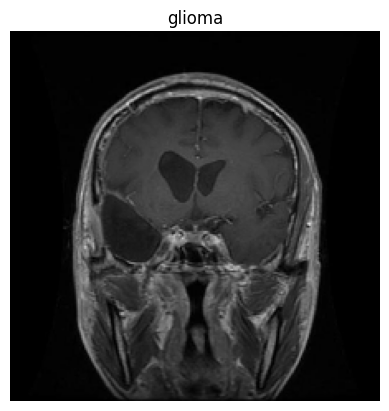

In [78]:
#  viewing each class images
# Giloma
glioma_image="/content/drive/MyDrive/Final_project/Tumor/train/glioma/Tr-gl_0011_jpg.rf.61e213cb5a0f97fedd1bacd0428c0133.jpg"
img=load_img(glioma_image,target_size=(224,224))
plt.imshow(img)
plt.title("glioma")
plt.axis("off")
plt.show()


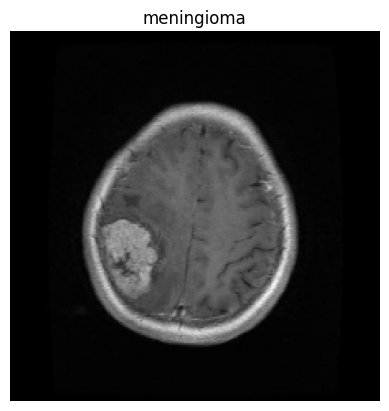

In [79]:
meningioma_image="/content/drive/MyDrive/Final_project/Tumor/train/meningioma/Tr-me_0011_jpg.rf.c039f84f918b11f4a74316cd5bb2c231.jpg"
img=load_img(meningioma_image,target_size=(224,224))
plt.imshow(img)
plt.title("meningioma")
plt.axis("off")
plt.show()

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


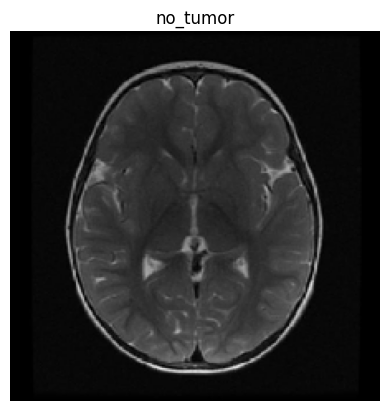

In [81]:
no_tumor_image="/content/drive/MyDrive/Final_project/Tumor/train/no_tumor/Tr-no_0013_jpg.rf.ba75dd083e4c092e31fd59db1a7de9dc.jpg"
img=load_img(no_tumor_image,target_size=(224,224))
plt.imshow(img)
plt.title("no_tumor")
plt.axis("off")
plt.show()

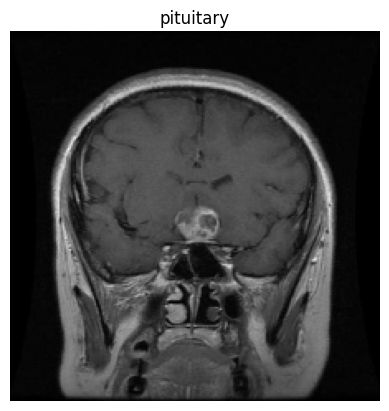

In [82]:
pituitary_image="/content/drive/MyDrive/Final_project/Tumor/train/pituitary/Tr-pi_0010_jpg.rf.caed12ef1e5fad2e91a79e5773efc0bb.jpg"
img=load_img(pituitary_image,target_size=(224,224))
plt.imshow(img)
plt.title("pituitary")
plt.axis("off")
plt.show()

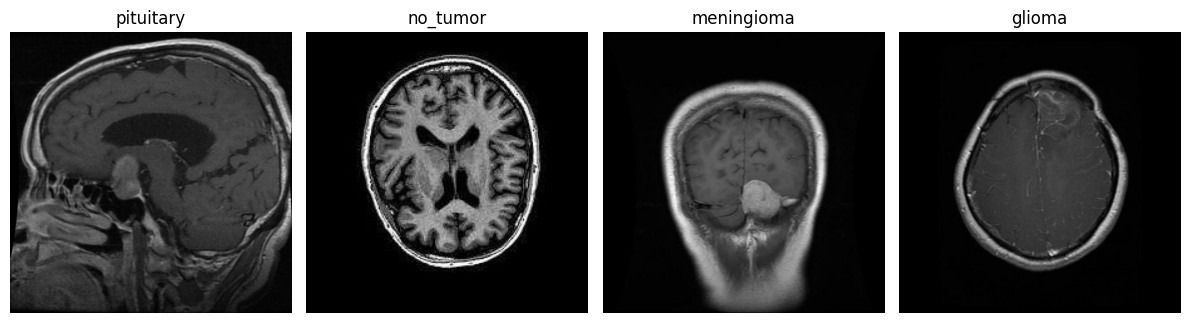

In [83]:
# seeing all class images in the train directory

import os
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

base_path = '/content/drive/MyDrive/Final_project/Tumor/train'

# Get only directories (skip files)
class_names = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

plt.figure(figsize=(12, 6))

for idx, class_name in enumerate(class_names):
    class_folder = os.path.join(base_path, class_name)
    image_list = os.listdir(class_folder)
    image_path = os.path.join(class_folder, image_list[0])
    img = load_img(image_path)

    plt.subplot(1, len(class_names), idx + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()



# Data Agumentation


In [2]:

# taining data genarator with agumentasion
train_datagen=ImageDataGenerator(rescale=1./255,
                                  rotation_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                 fill_mode="nearest")

# validation and test data genarator only rescaleing no data agumentation
valid_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)











NameError: name 'ImageDataGenerator' is not defined

In [85]:
# seting image size and batch size
img_size=(224,224)
batch_size=32

# creating data gendrators
train_generator=train_datagen.flow_from_directory(train_data,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical")
valid_generator=valid_datagen.flow_from_directory(valid_data,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical")
test_generator=test_datagen.flow_from_directory(test_data,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical")


Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


In [86]:
# class name and no_class
print(train_generator.class_indices)
class_name=list(train_generator.class_indices.keys())
no_class=len(class_name)
print("no_of_class:",no_class)

{'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}
no_of_class: 4


# ***Building the CNN***


In [87]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512,activation="relu"),
    layers.Dense(no_class,activation="softmax")
])

In [88]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,680,580 (36.93 MB)

 Trainable params: 9,680,580 (36.93 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 647s 12s/step - accuracy: 0.4395 - loss: 1.2383 - precision: 0.4714 - recall: 0.1478 - val_accuracy: 0.7375 - val_loss: 0.7406 - val_precision: 0.7720 - val_recall: 0.6771
Epoch 2/10
 1/52 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.6250 - loss: 0.9963 - precision: 0.6429 - recall: 0.5625

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 236ms/step - accuracy: 0.6250 - loss: 0.9963 - precision: 0.6429 - recall: 0.5625 - val_accuracy: 0.6750 - val_loss: 0.8455 - val_precision: 0.7325 - val_recall: 0.6333
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 792ms/step - accuracy: 0.6823 - loss: 0.7893 - precision: 0.7459 - recall: 0.6036 - val_accuracy: 0.7708 - val_loss: 0.6519 - val_precision: 0.7973 - val_recall: 0.7292
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.6875 - loss: 0.8871 - precision: 0.6538 - recall: 0.5312 - val_accuracy: 0.7625 - val_loss: 0.6638 - val_precision: 0.7877 - val_recall: 0.7188
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 82s 847ms/step - accuracy: 0.7470 - loss: 0.6317 - precision: 0.7853 - recall: 0.6985 - val_accuracy: 0.7667 - val_loss: 0.6121 - val_precision: 0.7881 - val_recall: 0.7437
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.8125 - loss: 0.5127 - precision: 0.8065 - recall: 0.7812 - val_accuracy: 0.7542 - val_loss: 0.6446 - val

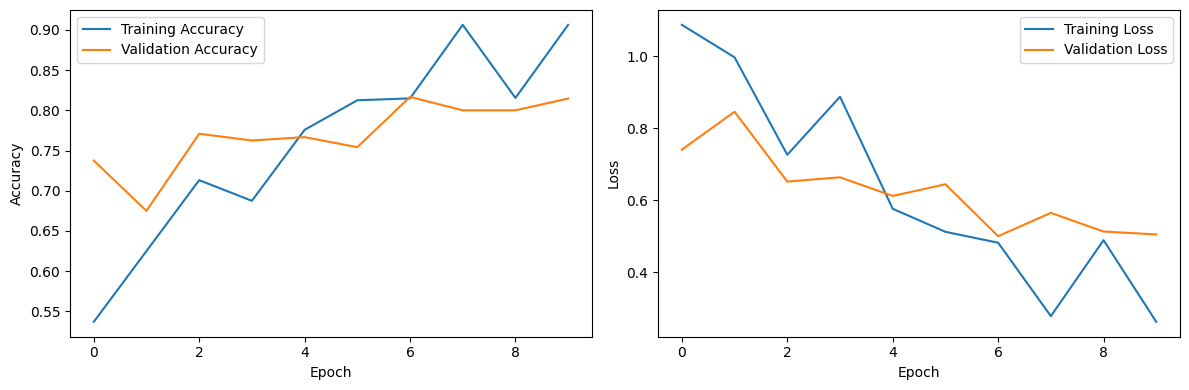

In [90]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [91]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_generator)
print(f'\nTest accuracy: {test_acc:.4f}')
print(f'Test precision: {test_precision:.4f}')
print(f'Test recall: {test_recall:.4f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 96s 12s/step - accuracy: 0.7820 - loss: 0.5341 - precision: 0.7964 - recall: 0.7767

Test accuracy: 0.7805
Test precision: 0.7983
Test recall: 0.7724


In [92]:
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step


In [93]:
true_classes = test_generator.classes


In [94]:
print('\nClassification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_names))

# Confusion matrix
conf_mat = confusion_matrix(true_classes, predicted_classes)
print('\nConfusion Matrix:')
print(conf_mat)


Classification Report:
              precision    recall  f1-score   support

   pituitary       0.33      0.38      0.35        80
    no_tumor       0.13      0.06      0.09        63
  meningioma       0.22      0.31      0.25        49
      glioma       0.23      0.24      0.23        54

    accuracy                           0.25       246
   macro avg       0.23      0.25      0.23       246
weighted avg       0.24      0.25      0.24       246


Confusion Matrix:
[[30 14 20 16]
 [22  4 17 20]
 [20  6 15  8]
 [18  6 17 13]]


# **Transfer learning models**

In [95]:
from tensorflow.keras.applications import (VGG16, ResNet50, MobileNet,
                                          InceptionV3, EfficientNetB0)
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model_comparison = []

In [96]:
# vgg16
def evaluate_vgg16():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.2),
        Dense(no_class, activation='softmax')
    ])

    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy',
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='recall')])

    history = model.fit(
        train_generator,
        validation_data=valid_generator,
        epochs=10,
        callbacks=[EarlyStopping(patience=3)]
    )

    return model, history

vgg_model, vgg_history = evaluate_vgg16()
model_comparison.append({
    'Model': 'VGG16',
    'Val Accuracy': max(vgg_history.history['val_accuracy']),
    'Val Precision': max(vgg_history.history['val_precision']),
    'Val Recall': max(vgg_history.history['val_recall']),
    'Parameters': f"{vgg_model.count_params():,}",
    'Inference Time': 'Medium',
    'Best For': 'Medium-sized datasets'
})

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.3010 - loss: 1.4183 - precision: 0.3041 - recall: 0.0078 - val_accuracy: 0.4741 - val_loss: 1.2202 - val_precision: 1.0000 - val_recall: 0.0199
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 649ms/step - accuracy: 0.5146 - loss: 1.1908 - precision: 0.9462 - recall: 0.0904 - val_accuracy: 0.6434 - val_loss: 1.0945 - val_precision: 0.8692 - val_recall: 0.1853
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 36s 677ms/step - accuracy: 0.5852 - loss: 1.0824 - precision: 0.8610 - recall: 0.2122 - val_accuracy: 0.6813 - val_loss: 1.0091 - val_precision: 0.8134 - val_recall: 0.2171
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 35s 649ms/step - accuracy: 0.6491 - loss: 0.9907 - precision: 0.8542 - recall: 0.2888 - val_accuracy: 0.6932 - val_loss: 0.9495 - val_precision: 0.8083 - val_recall: 0.3108
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 35s 665ms/step - accuracy: 0.6350 - loss: 0.9689 - precision: 0.7958 -

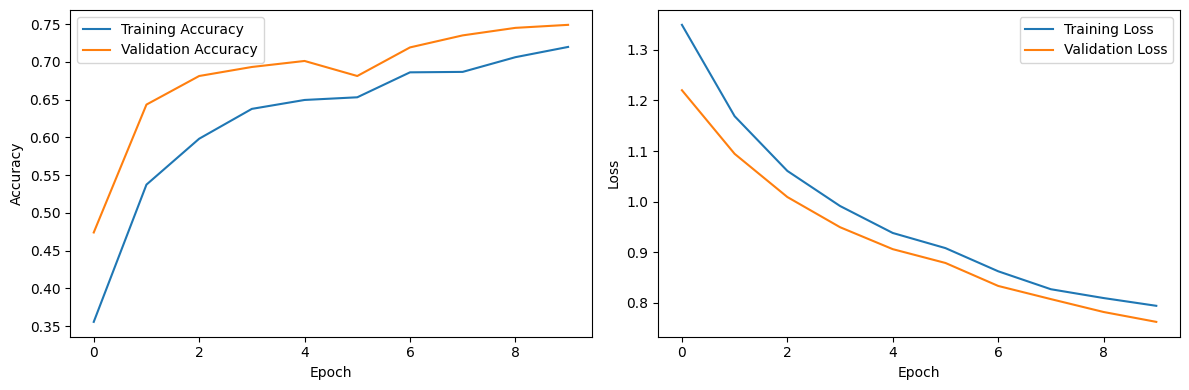

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - accuracy: 0.7501 - loss: 0.8039 - precision: 0.8306 - recall: 0.4850

Test accuracy: 0.7520
Test precision: 0.8493
Test recall: 0.5041
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 293ms/step


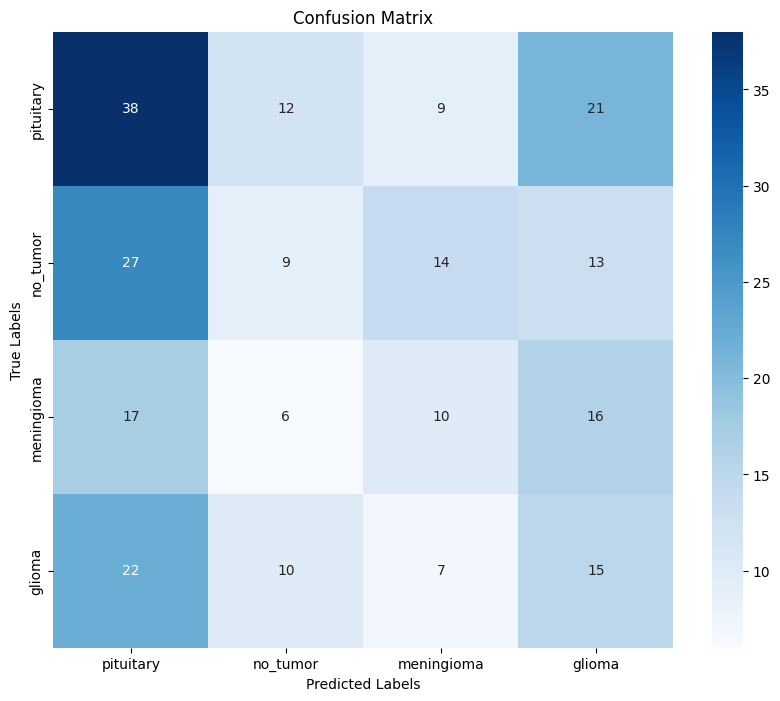

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(vgg_history)


# Evaluate on test set (assuming you have a test_generator)
test_generator.reset() # Reset the generator before evaluating
test_loss, test_acc, test_precision, test_recall = vgg_model.evaluate(test_generator)
print(f'\nTest accuracy: {test_acc:.4f}')
print(f'Test precision: {test_precision:.4f}')
print(f'Test recall: {test_recall:.4f}')


# Generate predictions
predictions = vgg_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes

# Confusion Matrix
conf_mat = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [98]:
# resnet50
def evaluate_resnet50():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = tf.keras.applications.resnet50.preprocess_input(inputs)
    x = base_model(x, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.2)(x)
    outputs = Dense(no_class, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy', 'precision', 'recall'])

    history = model.fit(
        train_generator,
        validation_data=valid_generator,
        epochs=10,
        callbacks=[EarlyStopping(patience=3)]
    )

    return model, history

resnet_model, resnet_history = evaluate_resnet50()
model_comparison.append({
    'Model': 'ResNet50',
    'Val Accuracy': max(resnet_history.history['val_accuracy']),
    'Val Precision': max(resnet_history.history['val_precision']),
    'Val Recall': max(resnet_history.history['val_recall']),
    'Parameters': f"{resnet_model.count_params():,}",
    'Inference Time': 'Medium',
    'Best For': 'General purpose'
})


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 69s 928ms/step - accuracy: 0.2790 - loss: 1.5239 - precision: 0.3011 - recall: 0.0482 - val_accuracy: 0.4024 - val_loss: 1.2558 - val_precision: 0.8148 - val_recall: 0.0438
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 647ms/step - accuracy: 0.3928 - loss: 1.3133 - precision: 0.5208 - recall: 0.0606 - val_accuracy: 0.3406 - val_loss: 1.2200 - val_precision: 0.8182 - val_recall: 0.0538
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 627ms/step - accuracy: 0.4452 - loss: 1.2209 - precision: 0.6973 - recall: 0.0901 - val_accuracy: 0.5239 - val_loss: 1.1535 - val_precision: 0.8421 - val_recall: 0.0956
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 43s 676ms/step - accuracy: 0.4985 - loss: 1.1811 - precision: 0.7341 - recall: 0.1244 - val_accuracy: 0.5797 - val_loss: 1.1227 - val_precision: 0.8103 - val_recall: 0.0936
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 622ms/step - accuracy: 0.5266 - loss: 1.1524 - precision: 0.767

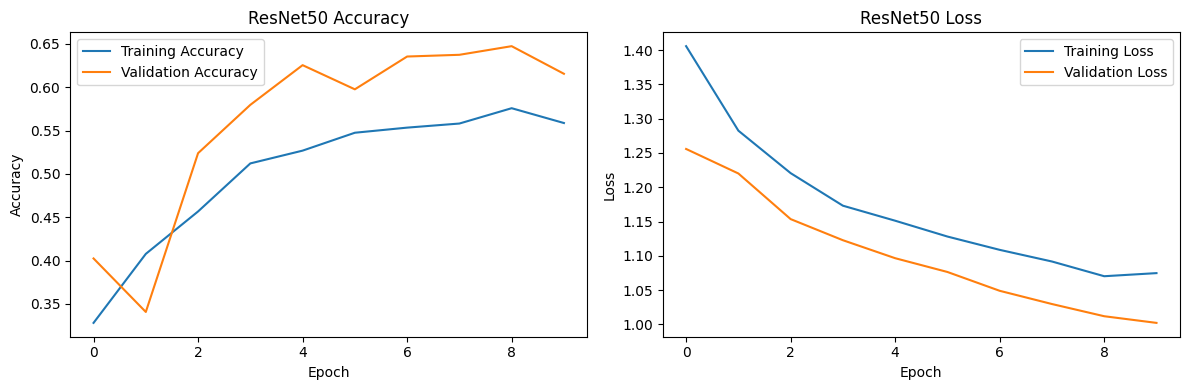

In [99]:
import matplotlib.pyplot as plt

def plot_history(history, model_name="ResNet50"):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call it with:
plot_history(resnet_history, "ResNet50")


8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 919ms/step


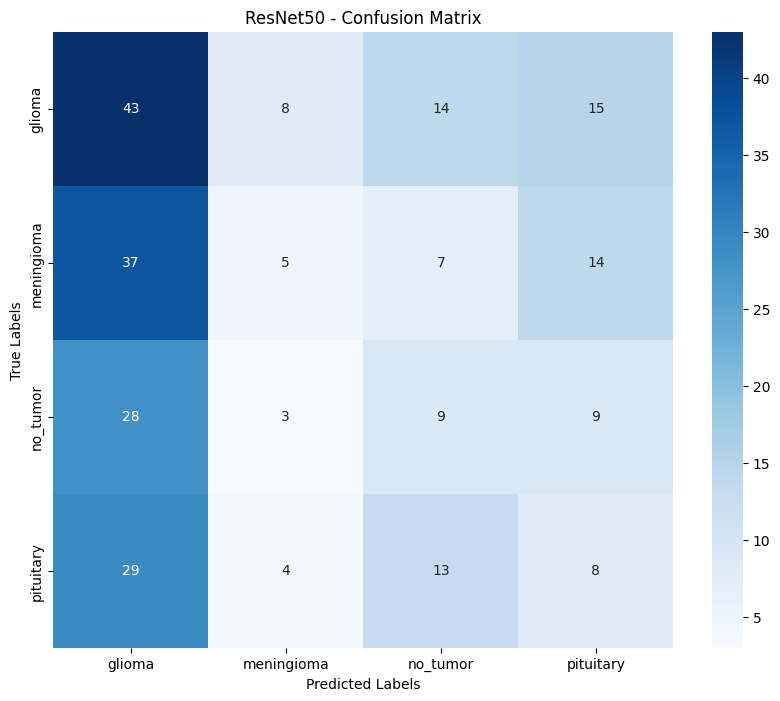

In [100]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get predictions
test_generator.reset()
predictions = resnet_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Step 2: Get true class labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # class names

# Step 3: Generate confusion matrix
conf_mat = confusion_matrix(true_classes, predicted_classes)

# Step 4: Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('ResNet50 - Confusion Matrix')
plt.show()


# **Mobilenet**

In [101]:
def evaluate_mobilenet():
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.2),
        Dense(no_class, activation='softmax')
    ])

    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy', 'precision', 'recall'])

    history = model.fit(
        train_generator,
        validation_data=valid_generator,
        epochs=10,
        callbacks=[EarlyStopping(patience=3)]
    )

    return model, history

mobilenet_model, mobilenet_history = evaluate_mobilenet()
model_comparison.append({
    'Model': 'MobileNet',
    'Val Accuracy': max(mobilenet_history.history['val_accuracy']),
    'Val Precision': max(mobilenet_history.history['val_precision']),
    'Val Recall': max(mobilenet_history.history['val_recall']),
    'Parameters': f"{mobilenet_model.count_params():,}",
    'Inference Time': 'Fast',
    'Best For': 'Mobile/Edge devices'
})

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 874ms/step - accuracy: 0.4848 - loss: 1.3000 - precision: 0.5691 - recall: 0.3754 - val_accuracy: 0.7948 - val_loss: 0.5451 - val_precision: 0.8620 - val_recall: 0.7092
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 620ms/step - accuracy: 0.8077 - loss: 0.5561 - precision: 0.8538 - recall: 0.7336 - val_accuracy: 0.8466 - val_loss: 0.4336 - val_precision: 0.8886 - val_recall: 0.8108
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 32s 602ms/step - accuracy: 0.8549 - loss: 0.4175 - precision: 0.8821 - recall: 0.8081 - val_accuracy: 0.8327 - val_loss: 0.4164 - val_precision: 0.8661 - val_recall: 0.7988
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 33s 624ms/step - accuracy: 0.8590 - loss: 0.3700 - precision: 0.8945 - recall: 0.8328 - val_accuracy: 0.8845 - val_loss: 0.3347 - val_precision: 0.9097 - val_recall: 0.8625
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 32s 613ms/step - accuracy: 0.9014 - loss: 0.3026 - precision: 0.919

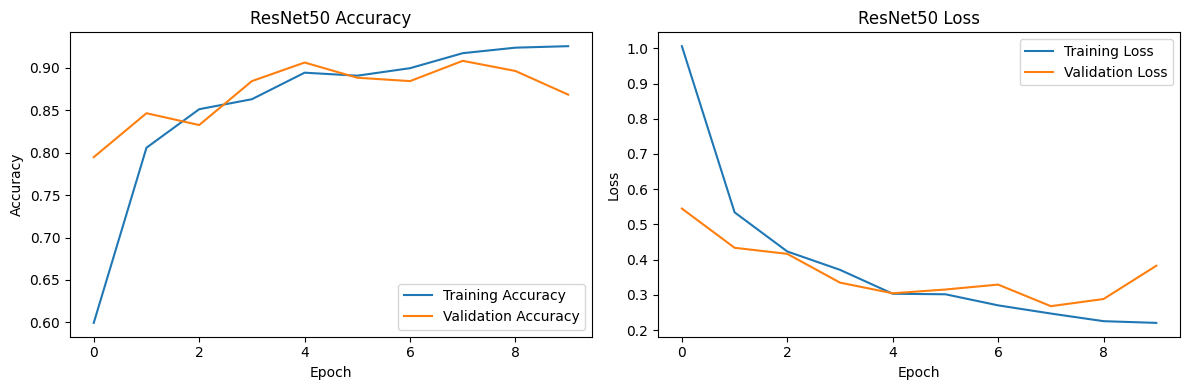

In [102]:
plot_history(mobilenet_history)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.8609 - loss: 0.3883 - precision: 0.8660 - recall: 0.8393

MobileNet Test accuracy: 0.8496
MobileNet Test precision: 0.8559
MobileNet Test recall: 0.8211


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 473ms/step


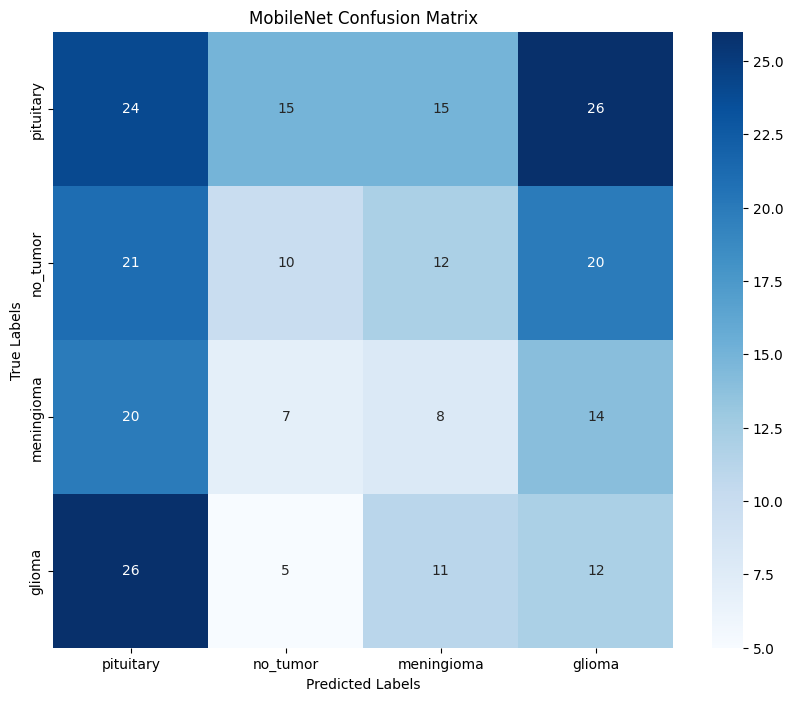

In [103]:
test_generator.reset()  # Reset the generator before evaluating
test_loss, test_acc, test_precision, test_recall = mobilenet_model.evaluate(test_generator)
print(f'\nMobileNet Test accuracy: {test_acc:.4f}')
print(f'MobileNet Test precision: {test_precision:.4f}')
print(f'MobileNet Test recall: {test_recall:.4f}')

# Generate predictions for MobileNet
predictions = mobilenet_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes for MobileNet
true_classes = test_generator.classes

# Confusion Matrix for MobileNet
conf_mat = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix for MobileNet using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('MobileNet Confusion Matrix')
plt.show()

In [1]:
def evaluate_inception():
    # Special generator for Inception's 299x299 input
    inception_train_gen = train_datagen.flow_from_directory(
        train_data, target_size=(299, 299), batch_size=batch_size)
    inception_val_gen = valid_datagen.flow_from_directory(
        valid_data, target_size=(299, 299), batch_size=batch_size)

    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
    base_model.trainable = False

    inputs = tf.keras.Input(shape=(299, 299, 3))
    x = tf.keras.applications.inception_v3.preprocess_input(inputs)
    x = base_model(x, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.2)(x)
    outputs = Dense(no_class, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy', 'precision', 'recall'])

    history = model.fit(
        inception_train_gen,
        validation_data=inception_val_gen,
        epochs=10,
        callbacks=[EarlyStopping(patience=3)]
    )

    return model, history

inception_model, inception_history = evaluate_inception()
model_comparison.append({
    'Model': 'InceptionV3',
    'Val Accuracy': max(inception_history.history['val_accuracy']),
    'Val Precision': max(inception_history.history['val_precision']),
    'Val Recall': max(inception_history.history['val_recall']),
    'Parameters': f"{inception_model.count_params():,}",
    'Inference Time': 'Medium',
    'Best For': 'Multi-scale features'
})

NameError: name 'train_datagen' is not defined

Model Comparison

In [ ]:
import pandas as pd
comparison_df = pd.DataFrame(model_comparison)
comparison_df = comparison_df.sort_values('Val Accuracy', ascending=False)
comparison_df.style.background_gradient(cmap='Blues', subset=['Val Accuracy', 'Val Precision', 'Val Recall'])

In [ ]:
comparison_df.to_csv("/content/drive/MyDrive/Final_project/model_comparison.csv", index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final_project/model_comparison.csv')


# Find the best model based on validation accuracy
best_model = df.loc[df['Val Accuracy'].idxmax()]

print(f"The best performing model is:\n{best_model}")

# Plotting the bar chart
plt.figure(figsize=(10, 6))
df.plot(x='Model', y=['Val Accuracy', 'Val Precision', 'Val Recall'], kind='bar', ax=plt.gca())
plt.title('Model Performance Comparison')
plt.ylabel('Metrics')
plt.xlabel('Models')


plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

In [ ]:
mobilenet_model.save('/content/drive/MyDrive/Final_project/model_mobilenet.h5')

In [ ]:
!pip install streamlit numpy pillow tensorflow

In [ ]:
!pip install streamlit pyngrok --quiet


In [ ]:
code = '''
import streamlit as st
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import os

# Define class labels
CLASSES = ['glioma', 'meningioma', 'no_tumor', 'pituitary']

# Load model from Google Drive path
@st.cache_resource
def load_custom_model():
    model_path = "/content/drive/MyDrive/Final_project/model_mobilenet.h5"
    if not os.path.exists(model_path):
        st.error(f"❌ Model file not found at {model_path}")
        return None
    return load_model(model_path)

model = load_custom_model()

if model is None:
    st.stop()

# App title and instructions
st.title("🧠 Brain Tumor MRI Classifier")
st.write("Upload an MRI image. The model will predict the tumor type.")

# Upload image
uploaded_file = st.file_uploader("📂 Choose an MRI image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Show uploaded image
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded MRI Image", use_container_width=True)

    # Preprocess image
    image = image.resize((224, 224))
    image_array = img_to_array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Predict
    with st.spinner("🔍 Identifying tumor type..."):
        try:
            predictions = model.predict(image_array)
            predicted_class = CLASSES[np.argmax(predictions)]
            confidence = np.max(predictions)
        except Exception as e:
            st.error(f"Prediction failed: {e}")
            st.stop()

    # Show prediction result
    st.subheader("✅ Predicted Results:")
    st.success(f"Tumor Type: **{predicted_class}**")
    st.info(f"Confidence: **{confidence * 100:.2f}%**")

    # Show all class probabilities
    st.subheader("📊 Class Probabilities:")
    for cls, prob in zip(CLASSES, predictions[0]):
        st.write(f"{cls}: {prob * 100:.2f}%")
        st.progress(float(prob))
'''
with open('app.py', 'w') as f:
    f.write(code)


In [ ]:
from pyngrok import conf, ngrok

# Set your authtoken
conf.get_default().auth_token = "31QdTBTVR6MqTZ79HMMU36vAMSC_3H5EiPJDgwwd5GVVuUr7G"

# Kill any existing tunnels
ngrok.kill()

# Start the tunnel with HTTP spec
public_url = ngrok.connect("http://localhost:8501")

print("✅ Streamlit app is live at:", public_url)

# Run the app
!streamlit run app.py &>/dev/null &
